# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 2.6MB/s eta 0:00:01
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0


Extracting mnist: 100%|██████████| 60.0K/60.0K [00:12<00:00, 4.62KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

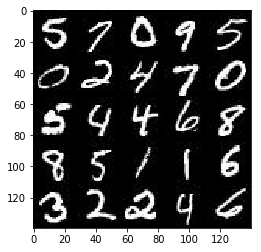

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

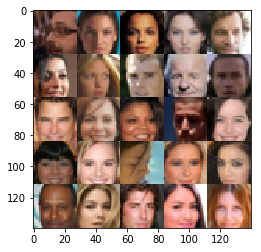

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3 OR 28*28*1
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    training = is_train
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=training)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28xout_dim now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
     # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [21]:
def train(epoch_count, batch_size, z_dim, lr, beta1, get_batches, data_shape, data_image_mode, alpha):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    losses = []
    steps = 0
    _, width, height, n_channel = data_shape

    
    input_real, input_z, learning_rate = model_inputs(width, height, n_channel, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, n_channel, alpha=alpha)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()


    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model

                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # print('batch_images.shape: ', batch_images.shape)
                # print('batch_z.shape: ', batch_z.shape)

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: lr})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: lr})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 6, input_z, n_channel, data_image_mode)
        
        saver.save(sess, './checkpoints/generator.ckpt') 

    return losses
  
                
                

In [13]:
print_every = 10
show_every = 100

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [14]:
from workspace_utils import active_session

Epoch 1/4... Discriminator Loss: 0.7529... Generator Loss: 5.1557
Epoch 1/4... Discriminator Loss: 0.6214... Generator Loss: 1.3211
Epoch 1/4... Discriminator Loss: 0.5292... Generator Loss: 3.0664
Epoch 1/4... Discriminator Loss: 0.7512... Generator Loss: 1.7674
Epoch 1/4... Discriminator Loss: 0.8906... Generator Loss: 3.2603
Epoch 1/4... Discriminator Loss: 0.7159... Generator Loss: 1.0627
Epoch 1/4... Discriminator Loss: 1.3041... Generator Loss: 3.7547
Epoch 1/4... Discriminator Loss: 0.4756... Generator Loss: 1.6236
Epoch 1/4... Discriminator Loss: 0.2923... Generator Loss: 2.1840
Epoch 1/4... Discriminator Loss: 0.1814... Generator Loss: 2.4141


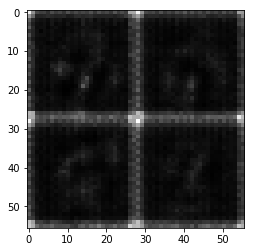

Epoch 1/4... Discriminator Loss: 0.1279... Generator Loss: 2.5646
Epoch 1/4... Discriminator Loss: 0.0591... Generator Loss: 3.4651
Epoch 1/4... Discriminator Loss: 0.0997... Generator Loss: 2.9091
Epoch 1/4... Discriminator Loss: 0.0413... Generator Loss: 4.4534
Epoch 1/4... Discriminator Loss: 4.4898... Generator Loss: 0.0276
Epoch 1/4... Discriminator Loss: 0.1879... Generator Loss: 3.7096
Epoch 1/4... Discriminator Loss: 0.1544... Generator Loss: 2.5309
Epoch 1/4... Discriminator Loss: 0.0407... Generator Loss: 4.4012
Epoch 1/4... Discriminator Loss: 0.0078... Generator Loss: 5.9353
Epoch 1/4... Discriminator Loss: 0.0093... Generator Loss: 6.0694


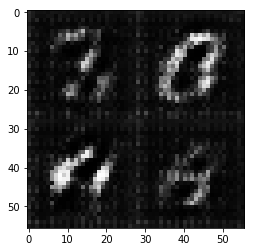

Epoch 1/4... Discriminator Loss: 0.0121... Generator Loss: 6.3206
Epoch 1/4... Discriminator Loss: 0.0836... Generator Loss: 2.8053
Epoch 1/4... Discriminator Loss: 1.1317... Generator Loss: 0.6351
Epoch 1/4... Discriminator Loss: 0.4968... Generator Loss: 1.3175
Epoch 1/4... Discriminator Loss: 1.7889... Generator Loss: 4.6763
Epoch 1/4... Discriminator Loss: 0.2703... Generator Loss: 1.9717
Epoch 1/4... Discriminator Loss: 0.0957... Generator Loss: 2.8659
Epoch 1/4... Discriminator Loss: 0.0586... Generator Loss: 4.4242
Epoch 1/4... Discriminator Loss: 0.0301... Generator Loss: 4.7098
Epoch 1/4... Discriminator Loss: 0.1379... Generator Loss: 4.9506


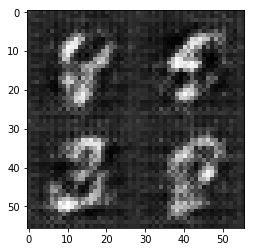

Epoch 1/4... Discriminator Loss: 0.1527... Generator Loss: 5.1699
Epoch 1/4... Discriminator Loss: 0.2723... Generator Loss: 2.5106
Epoch 1/4... Discriminator Loss: 0.6631... Generator Loss: 0.9812
Epoch 1/4... Discriminator Loss: 0.1542... Generator Loss: 3.4626
Epoch 1/4... Discriminator Loss: 0.0998... Generator Loss: 3.0847
Epoch 1/4... Discriminator Loss: 0.1105... Generator Loss: 3.6993
Epoch 1/4... Discriminator Loss: 0.2131... Generator Loss: 2.0658
Epoch 1/4... Discriminator Loss: 0.0952... Generator Loss: 4.4464
Epoch 1/4... Discriminator Loss: 0.3232... Generator Loss: 2.1569
Epoch 1/4... Discriminator Loss: 0.1222... Generator Loss: 3.3176


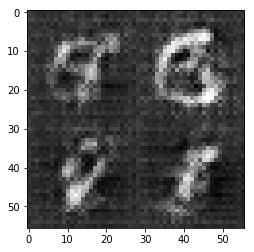

Epoch 1/4... Discriminator Loss: 0.2103... Generator Loss: 2.2388
Epoch 1/4... Discriminator Loss: 0.1558... Generator Loss: 2.3889
Epoch 1/4... Discriminator Loss: 0.1118... Generator Loss: 2.7284
Epoch 1/4... Discriminator Loss: 0.0752... Generator Loss: 4.1437
Epoch 1/4... Discriminator Loss: 0.1092... Generator Loss: 2.8125
Epoch 1/4... Discriminator Loss: 0.1056... Generator Loss: 3.0637
Epoch 2/4... Discriminator Loss: 0.6796... Generator Loss: 0.9621
Epoch 2/4... Discriminator Loss: 0.4291... Generator Loss: 1.4908
Epoch 2/4... Discriminator Loss: 0.3133... Generator Loss: 1.8382
Epoch 2/4... Discriminator Loss: 0.1629... Generator Loss: 2.6658


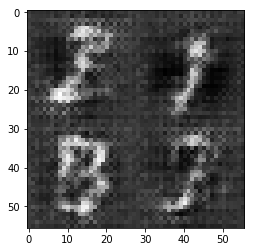

Epoch 2/4... Discriminator Loss: 0.1537... Generator Loss: 2.6921
Epoch 2/4... Discriminator Loss: 0.2455... Generator Loss: 2.1014
Epoch 2/4... Discriminator Loss: 0.1168... Generator Loss: 2.8052
Epoch 2/4... Discriminator Loss: 0.1498... Generator Loss: 2.5736
Epoch 2/4... Discriminator Loss: 0.1470... Generator Loss: 2.5037
Epoch 2/4... Discriminator Loss: 0.1091... Generator Loss: 2.9425
Epoch 2/4... Discriminator Loss: 0.4992... Generator Loss: 1.2672
Epoch 2/4... Discriminator Loss: 1.2643... Generator Loss: 2.4811
Epoch 2/4... Discriminator Loss: 0.4399... Generator Loss: 1.5981
Epoch 2/4... Discriminator Loss: 0.5633... Generator Loss: 1.0909


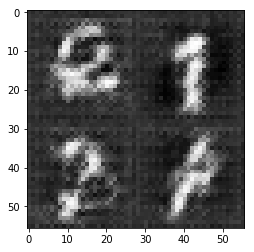

Epoch 2/4... Discriminator Loss: 0.3305... Generator Loss: 1.8201
Epoch 2/4... Discriminator Loss: 0.4713... Generator Loss: 3.4621
Epoch 2/4... Discriminator Loss: 0.0795... Generator Loss: 3.3519
Epoch 2/4... Discriminator Loss: 0.2471... Generator Loss: 3.1931
Epoch 2/4... Discriminator Loss: 0.2404... Generator Loss: 2.1721
Epoch 2/4... Discriminator Loss: 0.1089... Generator Loss: 3.1875
Epoch 2/4... Discriminator Loss: 0.0606... Generator Loss: 3.8135
Epoch 2/4... Discriminator Loss: 0.0589... Generator Loss: 4.3513
Epoch 2/4... Discriminator Loss: 0.0531... Generator Loss: 4.3349
Epoch 2/4... Discriminator Loss: 0.0254... Generator Loss: 4.9636


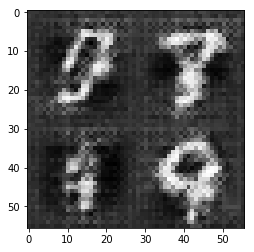

Epoch 2/4... Discriminator Loss: 0.1022... Generator Loss: 2.7626
Epoch 2/4... Discriminator Loss: 0.0318... Generator Loss: 4.1282
Epoch 2/4... Discriminator Loss: 0.2764... Generator Loss: 1.7566
Epoch 2/4... Discriminator Loss: 1.2308... Generator Loss: 1.1653
Epoch 2/4... Discriminator Loss: 0.4663... Generator Loss: 1.6486
Epoch 2/4... Discriminator Loss: 0.4385... Generator Loss: 1.3999
Epoch 2/4... Discriminator Loss: 0.2877... Generator Loss: 2.6494
Epoch 2/4... Discriminator Loss: 0.0614... Generator Loss: 3.9180
Epoch 2/4... Discriminator Loss: 0.0440... Generator Loss: 4.1002
Epoch 2/4... Discriminator Loss: 0.4805... Generator Loss: 1.2404


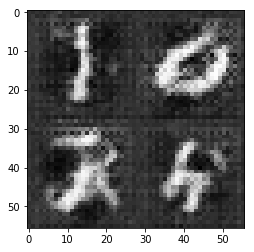

Epoch 2/4... Discriminator Loss: 0.0210... Generator Loss: 5.7797
Epoch 2/4... Discriminator Loss: 0.2122... Generator Loss: 2.0148
Epoch 2/4... Discriminator Loss: 0.0416... Generator Loss: 4.6439
Epoch 2/4... Discriminator Loss: 0.0365... Generator Loss: 4.8418
Epoch 2/4... Discriminator Loss: 0.0762... Generator Loss: 3.6135
Epoch 2/4... Discriminator Loss: 0.0701... Generator Loss: 3.2901
Epoch 2/4... Discriminator Loss: 0.0386... Generator Loss: 4.0543
Epoch 2/4... Discriminator Loss: 0.0191... Generator Loss: 5.2126
Epoch 2/4... Discriminator Loss: 0.0286... Generator Loss: 4.8939
Epoch 2/4... Discriminator Loss: 0.0291... Generator Loss: 4.6292


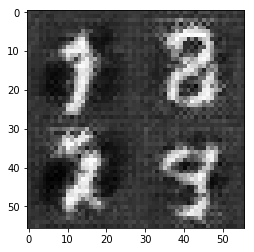

Epoch 2/4... Discriminator Loss: 0.0129... Generator Loss: 7.0673
Epoch 2/4... Discriminator Loss: 0.0333... Generator Loss: 5.5769
Epoch 2/4... Discriminator Loss: 0.0161... Generator Loss: 6.2054
Epoch 3/4... Discriminator Loss: 0.0229... Generator Loss: 4.6867
Epoch 3/4... Discriminator Loss: 12.4853... Generator Loss: 13.0527
Epoch 3/4... Discriminator Loss: 1.0890... Generator Loss: 1.2819
Epoch 3/4... Discriminator Loss: 0.8133... Generator Loss: 1.0122
Epoch 3/4... Discriminator Loss: 0.7342... Generator Loss: 1.0695
Epoch 3/4... Discriminator Loss: 0.6074... Generator Loss: 1.2793
Epoch 3/4... Discriminator Loss: 0.5848... Generator Loss: 1.2704


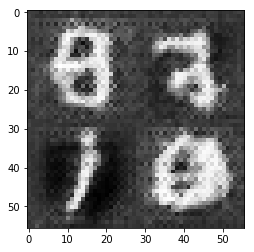

Epoch 3/4... Discriminator Loss: 1.1828... Generator Loss: 0.4553
Epoch 3/4... Discriminator Loss: 0.5873... Generator Loss: 1.1132
Epoch 3/4... Discriminator Loss: 0.5278... Generator Loss: 2.7898
Epoch 3/4... Discriminator Loss: 0.2260... Generator Loss: 2.2541
Epoch 3/4... Discriminator Loss: 0.3895... Generator Loss: 1.4566
Epoch 3/4... Discriminator Loss: 0.1828... Generator Loss: 2.3778
Epoch 3/4... Discriminator Loss: 1.2261... Generator Loss: 6.0878
Epoch 3/4... Discriminator Loss: 0.6806... Generator Loss: 2.0865
Epoch 3/4... Discriminator Loss: 0.4832... Generator Loss: 1.3901
Epoch 3/4... Discriminator Loss: 0.5149... Generator Loss: 1.2763


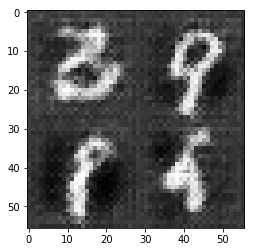

Epoch 3/4... Discriminator Loss: 0.1261... Generator Loss: 2.7733
Epoch 3/4... Discriminator Loss: 0.1122... Generator Loss: 4.2598
Epoch 3/4... Discriminator Loss: 0.0323... Generator Loss: 5.1003
Epoch 3/4... Discriminator Loss: 0.1833... Generator Loss: 2.2030
Epoch 3/4... Discriminator Loss: 0.1468... Generator Loss: 2.8846
Epoch 3/4... Discriminator Loss: 0.1073... Generator Loss: 2.8315
Epoch 3/4... Discriminator Loss: 0.0522... Generator Loss: 4.4989
Epoch 3/4... Discriminator Loss: 0.0275... Generator Loss: 5.4261
Epoch 3/4... Discriminator Loss: 0.0427... Generator Loss: 5.2744
Epoch 3/4... Discriminator Loss: 0.2329... Generator Loss: 1.9677


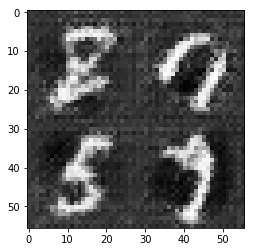

Epoch 3/4... Discriminator Loss: 0.0753... Generator Loss: 3.3131
Epoch 3/4... Discriminator Loss: 0.0407... Generator Loss: 4.5797
Epoch 3/4... Discriminator Loss: 0.5460... Generator Loss: 7.2355
Epoch 3/4... Discriminator Loss: 0.7931... Generator Loss: 2.5999
Epoch 3/4... Discriminator Loss: 0.3917... Generator Loss: 1.6680
Epoch 3/4... Discriminator Loss: 0.2914... Generator Loss: 2.1651
Epoch 3/4... Discriminator Loss: 0.0610... Generator Loss: 4.6494
Epoch 3/4... Discriminator Loss: 0.0742... Generator Loss: 4.3801
Epoch 3/4... Discriminator Loss: 0.0134... Generator Loss: 7.7910
Epoch 3/4... Discriminator Loss: 0.0483... Generator Loss: 4.0351


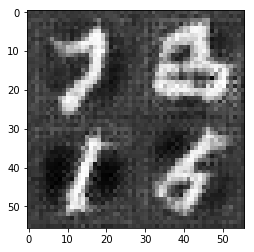

Epoch 3/4... Discriminator Loss: 0.0625... Generator Loss: 3.9294
Epoch 3/4... Discriminator Loss: 0.1686... Generator Loss: 2.5435
Epoch 3/4... Discriminator Loss: 0.0071... Generator Loss: 9.0311
Epoch 3/4... Discriminator Loss: 0.0075... Generator Loss: 8.2086
Epoch 3/4... Discriminator Loss: 0.2101... Generator Loss: 2.1290
Epoch 3/4... Discriminator Loss: 0.0087... Generator Loss: 10.4964
Epoch 3/4... Discriminator Loss: 0.0194... Generator Loss: 6.7114
Epoch 3/4... Discriminator Loss: 0.0082... Generator Loss: 10.3007
Epoch 3/4... Discriminator Loss: 0.5806... Generator Loss: 1.1010
Epoch 3/4... Discriminator Loss: 0.0042... Generator Loss: 13.0980


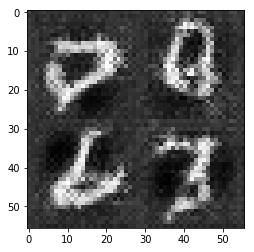

Epoch 4/4... Discriminator Loss: 0.2940... Generator Loss: 1.7317
Epoch 4/4... Discriminator Loss: 0.3131... Generator Loss: 1.7153
Epoch 4/4... Discriminator Loss: 0.0210... Generator Loss: 4.4197
Epoch 4/4... Discriminator Loss: 0.0114... Generator Loss: 6.0123
Epoch 4/4... Discriminator Loss: 0.0725... Generator Loss: 3.1539
Epoch 4/4... Discriminator Loss: 0.0392... Generator Loss: 3.8771
Epoch 4/4... Discriminator Loss: 0.0028... Generator Loss: 12.1234
Epoch 4/4... Discriminator Loss: 0.0873... Generator Loss: 2.9505
Epoch 4/4... Discriminator Loss: 0.0058... Generator Loss: 8.3674
Epoch 4/4... Discriminator Loss: 0.0024... Generator Loss: 10.8203


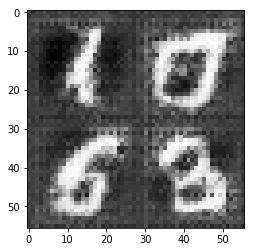

Epoch 4/4... Discriminator Loss: 0.0035... Generator Loss: 15.3144
Epoch 4/4... Discriminator Loss: 0.6218... Generator Loss: 1.0833
Epoch 4/4... Discriminator Loss: 4.3832... Generator Loss: 0.0188
Epoch 4/4... Discriminator Loss: 0.9104... Generator Loss: 1.3376
Epoch 4/4... Discriminator Loss: 0.7234... Generator Loss: 0.9626
Epoch 4/4... Discriminator Loss: 0.7334... Generator Loss: 1.6389
Epoch 4/4... Discriminator Loss: 0.7568... Generator Loss: 0.9999
Epoch 4/4... Discriminator Loss: 0.6868... Generator Loss: 1.0476
Epoch 4/4... Discriminator Loss: 1.2996... Generator Loss: 0.4023
Epoch 4/4... Discriminator Loss: 0.5556... Generator Loss: 1.3508


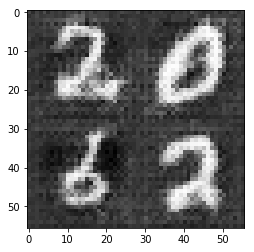

Epoch 4/4... Discriminator Loss: 1.0542... Generator Loss: 0.5855
Epoch 4/4... Discriminator Loss: 0.4615... Generator Loss: 1.6579
Epoch 4/4... Discriminator Loss: 0.7779... Generator Loss: 2.0304
Epoch 4/4... Discriminator Loss: 0.5262... Generator Loss: 1.2451
Epoch 4/4... Discriminator Loss: 0.5276... Generator Loss: 1.2119
Epoch 4/4... Discriminator Loss: 4.0568... Generator Loss: 0.0310
Epoch 4/4... Discriminator Loss: 0.4137... Generator Loss: 1.6637
Epoch 4/4... Discriminator Loss: 0.4237... Generator Loss: 1.4875
Epoch 4/4... Discriminator Loss: 0.3512... Generator Loss: 1.9517
Epoch 4/4... Discriminator Loss: 0.3533... Generator Loss: 1.6436


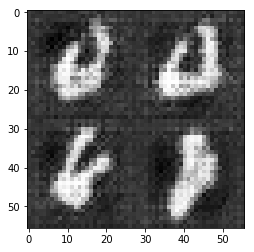

Epoch 4/4... Discriminator Loss: 0.7677... Generator Loss: 0.8615
Epoch 4/4... Discriminator Loss: 0.4167... Generator Loss: 1.6183
Epoch 4/4... Discriminator Loss: 0.4312... Generator Loss: 1.4131
Epoch 4/4... Discriminator Loss: 0.1803... Generator Loss: 2.2585
Epoch 4/4... Discriminator Loss: 0.1185... Generator Loss: 3.2147
Epoch 4/4... Discriminator Loss: 0.1294... Generator Loss: 3.0242
Epoch 4/4... Discriminator Loss: 0.0402... Generator Loss: 4.2739
Epoch 4/4... Discriminator Loss: 0.2466... Generator Loss: 2.6154
Epoch 4/4... Discriminator Loss: 0.0919... Generator Loss: 3.0194
Epoch 4/4... Discriminator Loss: 0.0599... Generator Loss: 4.1930


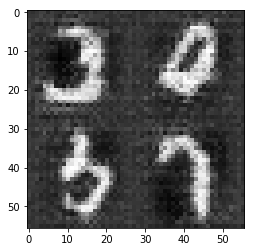

Epoch 4/4... Discriminator Loss: 0.0764... Generator Loss: 3.1396
Epoch 4/4... Discriminator Loss: 0.2086... Generator Loss: 4.7337
Epoch 4/4... Discriminator Loss: 0.1047... Generator Loss: 3.0186
Epoch 4/4... Discriminator Loss: 0.0325... Generator Loss: 4.3447
Epoch 4/4... Discriminator Loss: 0.1056... Generator Loss: 2.8577
Epoch 4/4... Discriminator Loss: 1.4410... Generator Loss: 0.5208
Epoch 4/4... Discriminator Loss: 0.4460... Generator Loss: 2.0534


In [22]:
batch_size = 128
z_dim = 100
learning_rate = 0.0003
alpha = 0
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 4

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with active_session():
    with tf.Graph().as_default():
        train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
              mnist_dataset.shape, mnist_dataset.image_mode, alpha)

## mnist_dataset.shape

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5506... Generator Loss: 1.1950
Epoch 1/1... Discriminator Loss: 0.4780... Generator Loss: 1.3351
Epoch 1/1... Discriminator Loss: 0.1810... Generator Loss: 2.4757
Epoch 1/1... Discriminator Loss: 0.6117... Generator Loss: 1.2150
Epoch 1/1... Discriminator Loss: 0.0171... Generator Loss: 6.5652
Epoch 1/1... Discriminator Loss: 0.7732... Generator Loss: 1.1596
Epoch 1/1... Discriminator Loss: 0.6104... Generator Loss: 1.0944
Epoch 1/1... Discriminator Loss: 0.2328... Generator Loss: 2.1454
Epoch 1/1... Discriminator Loss: 0.1429... Generator Loss: 2.7626
Epoch 1/1... Discriminator Loss: 0.0600... Generator Loss: 4.0457


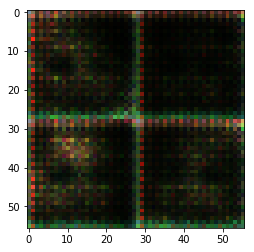

Epoch 1/1... Discriminator Loss: 0.0844... Generator Loss: 3.5793
Epoch 1/1... Discriminator Loss: 0.0708... Generator Loss: 5.3008
Epoch 1/1... Discriminator Loss: 0.1236... Generator Loss: 3.8773
Epoch 1/1... Discriminator Loss: 0.3807... Generator Loss: 1.9073
Epoch 1/1... Discriminator Loss: 0.0245... Generator Loss: 4.7671
Epoch 1/1... Discriminator Loss: 0.1561... Generator Loss: 2.5173
Epoch 1/1... Discriminator Loss: 0.0606... Generator Loss: 10.0432
Epoch 1/1... Discriminator Loss: 0.0143... Generator Loss: 5.7270
Epoch 1/1... Discriminator Loss: 0.0541... Generator Loss: 11.0242
Epoch 1/1... Discriminator Loss: 0.0862... Generator Loss: 3.0269


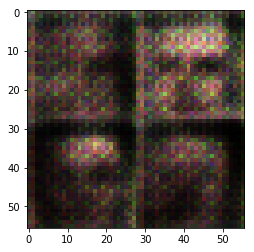

Epoch 1/1... Discriminator Loss: 0.0082... Generator Loss: 9.9349
Epoch 1/1... Discriminator Loss: 0.0254... Generator Loss: 4.1195
Epoch 1/1... Discriminator Loss: 0.7379... Generator Loss: 1.1692
Epoch 1/1... Discriminator Loss: 0.2806... Generator Loss: 1.8473
Epoch 1/1... Discriminator Loss: 2.3605... Generator Loss: 0.2165
Epoch 1/1... Discriminator Loss: 0.3800... Generator Loss: 1.5169
Epoch 1/1... Discriminator Loss: 0.1158... Generator Loss: 8.4864
Epoch 1/1... Discriminator Loss: 0.0169... Generator Loss: 8.0503
Epoch 1/1... Discriminator Loss: 0.2428... Generator Loss: 6.5471
Epoch 1/1... Discriminator Loss: 0.0292... Generator Loss: 5.3318


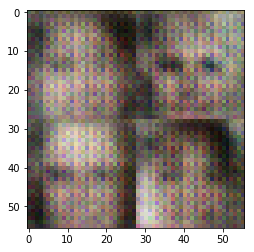

Epoch 1/1... Discriminator Loss: 0.0182... Generator Loss: 7.6539
Epoch 1/1... Discriminator Loss: 0.5533... Generator Loss: 1.0590
Epoch 1/1... Discriminator Loss: 0.0170... Generator Loss: 5.0744
Epoch 1/1... Discriminator Loss: 0.0814... Generator Loss: 3.4452
Epoch 1/1... Discriminator Loss: 0.0361... Generator Loss: 4.8413
Epoch 1/1... Discriminator Loss: 0.3716... Generator Loss: 2.9263
Epoch 1/1... Discriminator Loss: 0.3511... Generator Loss: 12.6700
Epoch 1/1... Discriminator Loss: 0.0307... Generator Loss: 10.6795
Epoch 1/1... Discriminator Loss: 0.5536... Generator Loss: 1.6495
Epoch 1/1... Discriminator Loss: 2.2252... Generator Loss: 7.9247


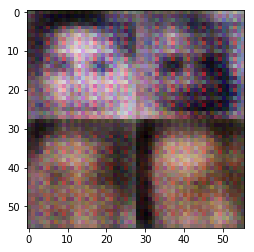

Epoch 1/1... Discriminator Loss: 0.3202... Generator Loss: 7.5652
Epoch 1/1... Discriminator Loss: 0.0730... Generator Loss: 6.5356
Epoch 1/1... Discriminator Loss: 0.0227... Generator Loss: 9.2081
Epoch 1/1... Discriminator Loss: 0.1980... Generator Loss: 4.7716
Epoch 1/1... Discriminator Loss: 2.8598... Generator Loss: 0.0743
Epoch 1/1... Discriminator Loss: 0.0997... Generator Loss: 3.2878
Epoch 1/1... Discriminator Loss: 0.2705... Generator Loss: 5.5642
Epoch 1/1... Discriminator Loss: 0.3961... Generator Loss: 8.5216
Epoch 1/1... Discriminator Loss: 0.1915... Generator Loss: 2.1562
Epoch 1/1... Discriminator Loss: 3.2759... Generator Loss: 0.0639


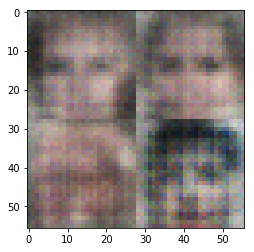

Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 0.4970
Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 0.6012
Epoch 1/1... Discriminator Loss: 2.6380... Generator Loss: 0.1338
Epoch 1/1... Discriminator Loss: 0.1010... Generator Loss: 3.0119
Epoch 1/1... Discriminator Loss: 0.0366... Generator Loss: 12.5862
Epoch 1/1... Discriminator Loss: 0.0396... Generator Loss: 10.0640
Epoch 1/1... Discriminator Loss: 0.2203... Generator Loss: 2.4044
Epoch 1/1... Discriminator Loss: 0.0221... Generator Loss: 13.5469
Epoch 1/1... Discriminator Loss: 0.0404... Generator Loss: 5.0141
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.3975


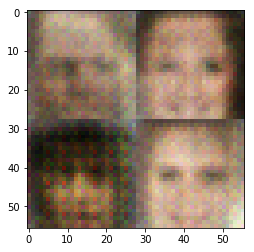

Epoch 1/1... Discriminator Loss: 0.0259... Generator Loss: 5.5490
Epoch 1/1... Discriminator Loss: 0.0872... Generator Loss: 3.8296
Epoch 1/1... Discriminator Loss: 1.2883... Generator Loss: 0.4680
Epoch 1/1... Discriminator Loss: 0.4303... Generator Loss: 1.4603
Epoch 1/1... Discriminator Loss: 0.0309... Generator Loss: 7.7586
Epoch 1/1... Discriminator Loss: 0.0193... Generator Loss: 10.2284
Epoch 1/1... Discriminator Loss: 0.2576... Generator Loss: 4.8920
Epoch 1/1... Discriminator Loss: 0.3140... Generator Loss: 1.9408
Epoch 1/1... Discriminator Loss: 0.2872... Generator Loss: 9.4459
Epoch 1/1... Discriminator Loss: 0.2266... Generator Loss: 4.7526


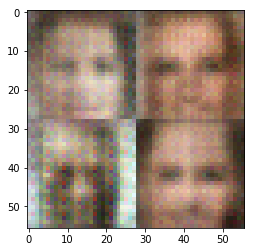

Epoch 1/1... Discriminator Loss: 0.1083... Generator Loss: 4.1306
Epoch 1/1... Discriminator Loss: 0.3268... Generator Loss: 1.4501
Epoch 1/1... Discriminator Loss: 0.0481... Generator Loss: 10.3315
Epoch 1/1... Discriminator Loss: 0.4467... Generator Loss: 7.1882
Epoch 1/1... Discriminator Loss: 0.0168... Generator Loss: 5.1437
Epoch 1/1... Discriminator Loss: 0.0082... Generator Loss: 7.0330
Epoch 1/1... Discriminator Loss: 0.3910... Generator Loss: 1.5272
Epoch 1/1... Discriminator Loss: 0.0264... Generator Loss: 8.0537
Epoch 1/1... Discriminator Loss: 0.2694... Generator Loss: 5.3294
Epoch 1/1... Discriminator Loss: 2.4710... Generator Loss: 0.1209


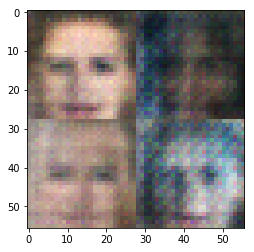

Epoch 1/1... Discriminator Loss: 0.1003... Generator Loss: 3.1540
Epoch 1/1... Discriminator Loss: 0.1584... Generator Loss: 8.7495
Epoch 1/1... Discriminator Loss: 0.0263... Generator Loss: 6.2927
Epoch 1/1... Discriminator Loss: 2.0097... Generator Loss: 0.2203
Epoch 1/1... Discriminator Loss: 0.0512... Generator Loss: 5.8786
Epoch 1/1... Discriminator Loss: 0.0684... Generator Loss: 7.5173
Epoch 1/1... Discriminator Loss: 0.0679... Generator Loss: 8.5116
Epoch 1/1... Discriminator Loss: 0.0647... Generator Loss: 8.8802
Epoch 1/1... Discriminator Loss: 0.3015... Generator Loss: 1.6651
Epoch 1/1... Discriminator Loss: 0.0093... Generator Loss: 6.2476


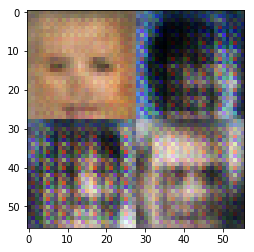

Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 1.9371... Generator Loss: 0.2399
Epoch 1/1... Discriminator Loss: 0.1235... Generator Loss: 9.4193
Epoch 1/1... Discriminator Loss: 0.0453... Generator Loss: 9.2094
Epoch 1/1... Discriminator Loss: 0.0144... Generator Loss: 5.8297
Epoch 1/1... Discriminator Loss: 0.0399... Generator Loss: 7.9304
Epoch 1/1... Discriminator Loss: 0.0197... Generator Loss: 9.0159
Epoch 1/1... Discriminator Loss: 0.2728... Generator Loss: 1.7860
Epoch 1/1... Discriminator Loss: 0.3054... Generator Loss: 1.6516
Epoch 1/1... Discriminator Loss: 0.0368... Generator Loss: 5.0910


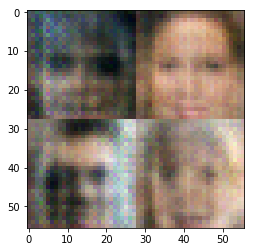

Epoch 1/1... Discriminator Loss: 0.1951... Generator Loss: 2.3033
Epoch 1/1... Discriminator Loss: 0.3343... Generator Loss: 1.7535
Epoch 1/1... Discriminator Loss: 0.1595... Generator Loss: 3.6911
Epoch 1/1... Discriminator Loss: 0.0119... Generator Loss: 6.9882
Epoch 1/1... Discriminator Loss: 0.2794... Generator Loss: 2.5261
Epoch 1/1... Discriminator Loss: 0.0710... Generator Loss: 3.8966
Epoch 1/1... Discriminator Loss: 0.0729... Generator Loss: 5.3241
Epoch 1/1... Discriminator Loss: 0.2025... Generator Loss: 2.2295
Epoch 1/1... Discriminator Loss: 0.8479... Generator Loss: 4.3180
Epoch 1/1... Discriminator Loss: 0.0890... Generator Loss: 6.2600


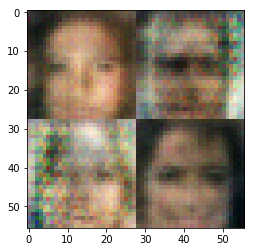

Epoch 1/1... Discriminator Loss: 0.0941... Generator Loss: 4.2014
Epoch 1/1... Discriminator Loss: 0.0910... Generator Loss: 4.2419
Epoch 1/1... Discriminator Loss: 0.0171... Generator Loss: 8.5793
Epoch 1/1... Discriminator Loss: 0.2004... Generator Loss: 2.7553
Epoch 1/1... Discriminator Loss: 0.0174... Generator Loss: 6.4096
Epoch 1/1... Discriminator Loss: 0.0518... Generator Loss: 3.6189
Epoch 1/1... Discriminator Loss: 0.0104... Generator Loss: 7.8797
Epoch 1/1... Discriminator Loss: 0.0193... Generator Loss: 10.8521
Epoch 1/1... Discriminator Loss: 0.0405... Generator Loss: 3.6149
Epoch 1/1... Discriminator Loss: 0.0220... Generator Loss: 11.2389


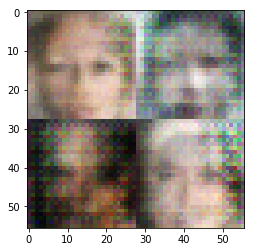

Epoch 1/1... Discriminator Loss: 0.0829... Generator Loss: 5.1698
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 7.9597
Epoch 1/1... Discriminator Loss: 0.0390... Generator Loss: 8.8953
Epoch 1/1... Discriminator Loss: 0.0810... Generator Loss: 2.9530
Epoch 1/1... Discriminator Loss: 0.0166... Generator Loss: 10.0073
Epoch 1/1... Discriminator Loss: 0.2039... Generator Loss: 8.3346
Epoch 1/1... Discriminator Loss: 0.6946... Generator Loss: 0.8939
Epoch 1/1... Discriminator Loss: 0.0109... Generator Loss: 6.3905
Epoch 1/1... Discriminator Loss: 0.0282... Generator Loss: 5.2781
Epoch 1/1... Discriminator Loss: 0.0332... Generator Loss: 11.0687


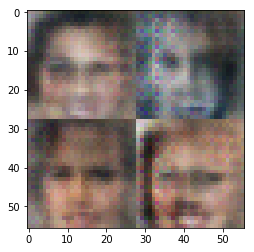

Epoch 1/1... Discriminator Loss: 0.0071... Generator Loss: 7.5055
Epoch 1/1... Discriminator Loss: 0.0139... Generator Loss: 6.4853
Epoch 1/1... Discriminator Loss: 0.0062... Generator Loss: 8.4078
Epoch 1/1... Discriminator Loss: 0.0281... Generator Loss: 10.1258
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 8.7512
Epoch 1/1... Discriminator Loss: 0.0098... Generator Loss: 6.9082
Epoch 1/1... Discriminator Loss: 0.0152... Generator Loss: 8.4232
Epoch 1/1... Discriminator Loss: 0.0091... Generator Loss: 7.7676
Epoch 1/1... Discriminator Loss: 0.0063... Generator Loss: 9.3607
Epoch 1/1... Discriminator Loss: 0.0351... Generator Loss: 8.1298


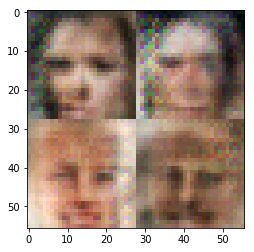

Epoch 1/1... Discriminator Loss: 0.0182... Generator Loss: 9.8614
Epoch 1/1... Discriminator Loss: 0.1724... Generator Loss: 2.3118
Epoch 1/1... Discriminator Loss: 0.0045... Generator Loss: 9.3394
Epoch 1/1... Discriminator Loss: 0.0190... Generator Loss: 5.1177
Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 7.9595
Epoch 1/1... Discriminator Loss: 0.1569... Generator Loss: 2.3975
Epoch 1/1... Discriminator Loss: 0.0052... Generator Loss: 7.2700
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 10.9696
Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 7.1231
Epoch 1/1... Discriminator Loss: 0.0087... Generator Loss: 10.8573


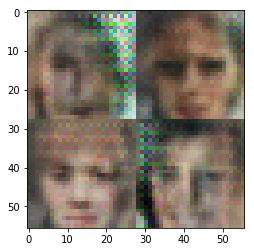

Epoch 1/1... Discriminator Loss: 0.0295... Generator Loss: 4.5208
Epoch 1/1... Discriminator Loss: 0.0159... Generator Loss: 9.2894
Epoch 1/1... Discriminator Loss: 0.0116... Generator Loss: 6.7084
Epoch 1/1... Discriminator Loss: 2.9519... Generator Loss: 12.0161
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.5052
Epoch 1/1... Discriminator Loss: 0.0393... Generator Loss: 3.8268
Epoch 1/1... Discriminator Loss: 0.0328... Generator Loss: 7.0285
Epoch 1/1... Discriminator Loss: 0.0159... Generator Loss: 7.7708
Epoch 1/1... Discriminator Loss: 1.0006... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 0.0109... Generator Loss: 7.6637


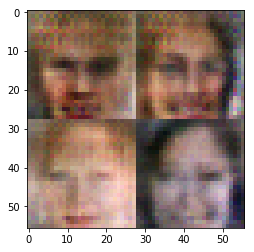

Epoch 1/1... Discriminator Loss: 0.4201... Generator Loss: 9.6253
Epoch 1/1... Discriminator Loss: 0.0138... Generator Loss: 7.2198
Epoch 1/1... Discriminator Loss: 0.2156... Generator Loss: 1.9876
Epoch 1/1... Discriminator Loss: 0.1173... Generator Loss: 2.6941
Epoch 1/1... Discriminator Loss: 0.0328... Generator Loss: 6.6233
Epoch 1/1... Discriminator Loss: 0.0597... Generator Loss: 3.3584
Epoch 1/1... Discriminator Loss: 0.0124... Generator Loss: 6.5461
Epoch 1/1... Discriminator Loss: 4.0630... Generator Loss: 10.8047
Epoch 1/1... Discriminator Loss: 0.9862... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 0.0306... Generator Loss: 8.8045


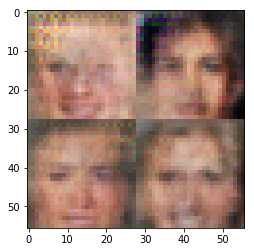

Epoch 1/1... Discriminator Loss: 0.1507... Generator Loss: 2.3582
Epoch 1/1... Discriminator Loss: 0.2571... Generator Loss: 2.1290
Epoch 1/1... Discriminator Loss: 0.0126... Generator Loss: 5.8509
Epoch 1/1... Discriminator Loss: 0.0114... Generator Loss: 9.9435
Epoch 1/1... Discriminator Loss: 0.0278... Generator Loss: 7.4736
Epoch 1/1... Discriminator Loss: 0.0920... Generator Loss: 6.2777
Epoch 1/1... Discriminator Loss: 0.1241... Generator Loss: 9.6078
Epoch 1/1... Discriminator Loss: 0.0286... Generator Loss: 4.8289
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 8.5260
Epoch 1/1... Discriminator Loss: 0.1297... Generator Loss: 2.9880


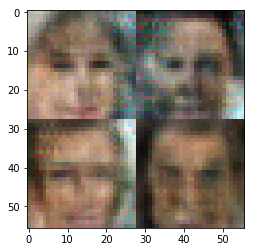

Epoch 1/1... Discriminator Loss: 0.0958... Generator Loss: 11.6345
Epoch 1/1... Discriminator Loss: 0.0797... Generator Loss: 3.0136
Epoch 1/1... Discriminator Loss: 0.0118... Generator Loss: 8.5662
Epoch 1/1... Discriminator Loss: 0.0085... Generator Loss: 8.4218
Epoch 1/1... Discriminator Loss: 0.0284... Generator Loss: 7.9430
Epoch 1/1... Discriminator Loss: 0.0762... Generator Loss: 4.6153
Epoch 1/1... Discriminator Loss: 0.0426... Generator Loss: 11.2697
Epoch 1/1... Discriminator Loss: 0.1226... Generator Loss: 5.4188
Epoch 1/1... Discriminator Loss: 0.0653... Generator Loss: 5.7599
Epoch 1/1... Discriminator Loss: 0.0459... Generator Loss: 3.6210


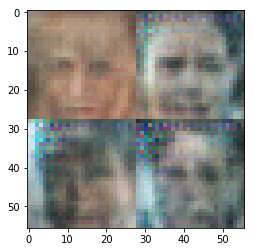

Epoch 1/1... Discriminator Loss: 0.7954... Generator Loss: 1.0268
Epoch 1/1... Discriminator Loss: 0.1948... Generator Loss: 2.4457
Epoch 1/1... Discriminator Loss: 0.1204... Generator Loss: 3.3236
Epoch 1/1... Discriminator Loss: 0.0954... Generator Loss: 3.4033
Epoch 1/1... Discriminator Loss: 0.7286... Generator Loss: 9.6628
Epoch 1/1... Discriminator Loss: 0.3779... Generator Loss: 10.8469
Epoch 1/1... Discriminator Loss: 0.0413... Generator Loss: 5.2506
Epoch 1/1... Discriminator Loss: 0.0601... Generator Loss: 9.6923
Epoch 1/1... Discriminator Loss: 1.7024... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 0.2383... Generator Loss: 3.6547


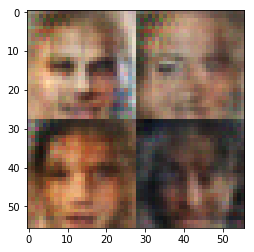

Epoch 1/1... Discriminator Loss: 0.1476... Generator Loss: 6.4239
Epoch 1/1... Discriminator Loss: 0.0292... Generator Loss: 8.5021
Epoch 1/1... Discriminator Loss: 0.0576... Generator Loss: 3.7556
Epoch 1/1... Discriminator Loss: 0.1539... Generator Loss: 3.0121
Epoch 1/1... Discriminator Loss: 0.0300... Generator Loss: 5.0342
Epoch 1/1... Discriminator Loss: 0.0902... Generator Loss: 5.3133
Epoch 1/1... Discriminator Loss: 0.2347... Generator Loss: 2.3811
Epoch 1/1... Discriminator Loss: 0.3644... Generator Loss: 1.5712
Epoch 1/1... Discriminator Loss: 0.0085... Generator Loss: 11.0032
Epoch 1/1... Discriminator Loss: 0.0444... Generator Loss: 3.9009


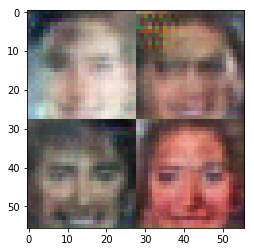

Epoch 1/1... Discriminator Loss: 0.0268... Generator Loss: 6.0482
Epoch 1/1... Discriminator Loss: 0.0105... Generator Loss: 7.5991
Epoch 1/1... Discriminator Loss: 0.0056... Generator Loss: 7.4537
Epoch 1/1... Discriminator Loss: 0.0615... Generator Loss: 7.1195
Epoch 1/1... Discriminator Loss: 0.0366... Generator Loss: 9.3500
Epoch 1/1... Discriminator Loss: 0.0523... Generator Loss: 3.7638
Epoch 1/1... Discriminator Loss: 0.2329... Generator Loss: 2.0018
Epoch 1/1... Discriminator Loss: 0.0193... Generator Loss: 6.8895
Epoch 1/1... Discriminator Loss: 1.1346... Generator Loss: 8.6580
Epoch 1/1... Discriminator Loss: 0.0090... Generator Loss: 11.9784


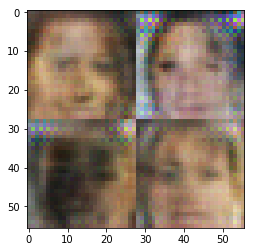

Epoch 1/1... Discriminator Loss: 0.0181... Generator Loss: 5.8278
Epoch 1/1... Discriminator Loss: 0.1320... Generator Loss: 4.8274
Epoch 1/1... Discriminator Loss: 0.0330... Generator Loss: 11.4597
Epoch 1/1... Discriminator Loss: 0.4341... Generator Loss: 1.4135
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 4.9224
Epoch 1/1... Discriminator Loss: 0.0091... Generator Loss: 11.1784
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 5.6491
Epoch 1/1... Discriminator Loss: 0.0315... Generator Loss: 13.7641
Epoch 1/1... Discriminator Loss: 0.0080... Generator Loss: 7.8019
Epoch 1/1... Discriminator Loss: 0.0350... Generator Loss: 10.5273


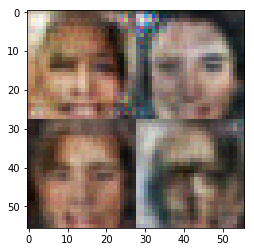

Epoch 1/1... Discriminator Loss: 0.0637... Generator Loss: 3.3276
Epoch 1/1... Discriminator Loss: 0.0372... Generator Loss: 12.4981
Epoch 1/1... Discriminator Loss: 0.0042... Generator Loss: 12.0395
Epoch 1/1... Discriminator Loss: 0.2065... Generator Loss: 2.1781
Epoch 1/1... Discriminator Loss: 0.1090... Generator Loss: 3.1436
Epoch 1/1... Discriminator Loss: 0.0851... Generator Loss: 3.4494
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 7.3393
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 1.2180
Epoch 1/1... Discriminator Loss: 1.2658... Generator Loss: 0.5319
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 0.4947


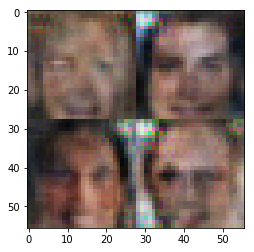

Epoch 1/1... Discriminator Loss: 0.2128... Generator Loss: 4.1567
Epoch 1/1... Discriminator Loss: 0.0727... Generator Loss: 6.6054
Epoch 1/1... Discriminator Loss: 0.5117... Generator Loss: 1.2713
Epoch 1/1... Discriminator Loss: 0.1970... Generator Loss: 2.3917
Epoch 1/1... Discriminator Loss: 0.1155... Generator Loss: 3.8991
Epoch 1/1... Discriminator Loss: 0.1873... Generator Loss: 2.5212
Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 1.1032
Epoch 1/1... Discriminator Loss: 0.0467... Generator Loss: 3.9960
Epoch 1/1... Discriminator Loss: 0.3036... Generator Loss: 5.6373
Epoch 1/1... Discriminator Loss: 0.1168... Generator Loss: 4.2949


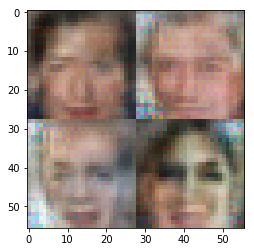

Epoch 1/1... Discriminator Loss: 0.7690... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 0.2583... Generator Loss: 4.7032
Epoch 1/1... Discriminator Loss: 0.0922... Generator Loss: 6.4868
Epoch 1/1... Discriminator Loss: 0.0397... Generator Loss: 4.6840
Epoch 1/1... Discriminator Loss: 0.0138... Generator Loss: 6.1572
Epoch 1/1... Discriminator Loss: 0.0380... Generator Loss: 6.0609
Epoch 1/1... Discriminator Loss: 0.0247... Generator Loss: 5.1603
Epoch 1/1... Discriminator Loss: 0.0484... Generator Loss: 3.9515
Epoch 1/1... Discriminator Loss: 0.0662... Generator Loss: 4.0223
Epoch 1/1... Discriminator Loss: 0.6971... Generator Loss: 1.6249


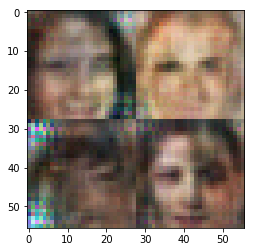

Epoch 1/1... Discriminator Loss: 0.2625... Generator Loss: 2.9204
Epoch 1/1... Discriminator Loss: 0.2591... Generator Loss: 3.3651
Epoch 1/1... Discriminator Loss: 0.1700... Generator Loss: 4.7575
Epoch 1/1... Discriminator Loss: 0.1307... Generator Loss: 2.8560
Epoch 1/1... Discriminator Loss: 0.2039... Generator Loss: 9.4588
Epoch 1/1... Discriminator Loss: 0.6495... Generator Loss: 1.0312
Epoch 1/1... Discriminator Loss: 0.4796... Generator Loss: 8.2099
Epoch 1/1... Discriminator Loss: 0.1115... Generator Loss: 5.5701
Epoch 1/1... Discriminator Loss: 0.0221... Generator Loss: 8.4940
Epoch 1/1... Discriminator Loss: 0.3617... Generator Loss: 1.5933


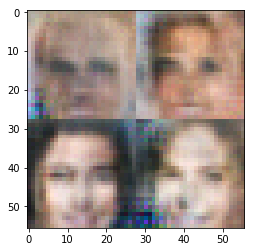

Epoch 1/1... Discriminator Loss: 0.0576... Generator Loss: 7.6777
Epoch 1/1... Discriminator Loss: 0.0865... Generator Loss: 4.6861
Epoch 1/1... Discriminator Loss: 0.0786... Generator Loss: 5.2709
Epoch 1/1... Discriminator Loss: 0.1126... Generator Loss: 2.9845
Epoch 1/1... Discriminator Loss: 0.1865... Generator Loss: 7.9567
Epoch 1/1... Discriminator Loss: 0.2009... Generator Loss: 2.1195
Epoch 1/1... Discriminator Loss: 0.6260... Generator Loss: 1.1036
Epoch 1/1... Discriminator Loss: 0.0139... Generator Loss: 6.0610
Epoch 1/1... Discriminator Loss: 0.1218... Generator Loss: 2.8522
Epoch 1/1... Discriminator Loss: 0.0344... Generator Loss: 4.5853


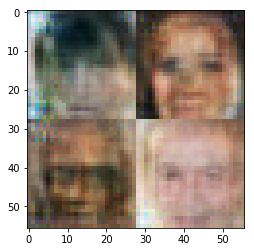

Epoch 1/1... Discriminator Loss: 0.5069... Generator Loss: 3.4712
Epoch 1/1... Discriminator Loss: 0.1418... Generator Loss: 5.0243
Epoch 1/1... Discriminator Loss: 0.8099... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 0.2718... Generator Loss: 5.1362
Epoch 1/1... Discriminator Loss: 0.1407... Generator Loss: 2.7080
Epoch 1/1... Discriminator Loss: 0.1019... Generator Loss: 3.1358
Epoch 1/1... Discriminator Loss: 0.2385... Generator Loss: 2.1110
Epoch 1/1... Discriminator Loss: 0.6208... Generator Loss: 1.0178
Epoch 1/1... Discriminator Loss: 0.0754... Generator Loss: 5.8548
Epoch 1/1... Discriminator Loss: 0.1809... Generator Loss: 2.5971


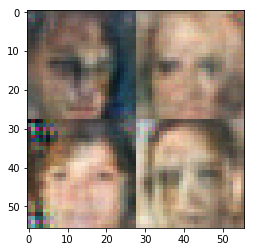

Epoch 1/1... Discriminator Loss: 0.0295... Generator Loss: 4.8263
Epoch 1/1... Discriminator Loss: 0.0364... Generator Loss: 4.4336
Epoch 1/1... Discriminator Loss: 0.0343... Generator Loss: 9.8397
Epoch 1/1... Discriminator Loss: 0.3611... Generator Loss: 1.7463
Epoch 1/1... Discriminator Loss: 0.0432... Generator Loss: 7.6468
Epoch 1/1... Discriminator Loss: 0.0443... Generator Loss: 13.5541
Epoch 1/1... Discriminator Loss: 0.3445... Generator Loss: 1.6313
Epoch 1/1... Discriminator Loss: 0.0811... Generator Loss: 6.9953
Epoch 1/1... Discriminator Loss: 0.3282... Generator Loss: 1.8301
Epoch 1/1... Discriminator Loss: 0.0432... Generator Loss: 4.2959


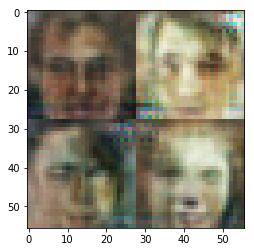

Epoch 1/1... Discriminator Loss: 1.0320... Generator Loss: 1.1406
Epoch 1/1... Discriminator Loss: 1.6593... Generator Loss: 0.3173
Epoch 1/1... Discriminator Loss: 0.1118... Generator Loss: 4.8529
Epoch 1/1... Discriminator Loss: 0.0633... Generator Loss: 4.3150
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 0.5851
Epoch 1/1... Discriminator Loss: 0.0341... Generator Loss: 5.1888
Epoch 1/1... Discriminator Loss: 0.1883... Generator Loss: 6.4358
Epoch 1/1... Discriminator Loss: 0.8468... Generator Loss: 0.8762
Epoch 1/1... Discriminator Loss: 0.2744... Generator Loss: 1.9154
Epoch 1/1... Discriminator Loss: 0.0484... Generator Loss: 8.0477


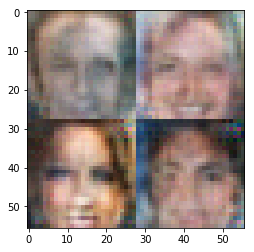

Epoch 1/1... Discriminator Loss: 0.3357... Generator Loss: 1.8363
Epoch 1/1... Discriminator Loss: 1.8309... Generator Loss: 0.2491
Epoch 1/1... Discriminator Loss: 1.6031... Generator Loss: 0.3404
Epoch 1/1... Discriminator Loss: 0.7321... Generator Loss: 3.0948
Epoch 1/1... Discriminator Loss: 0.1399... Generator Loss: 3.7849
Epoch 1/1... Discriminator Loss: 0.1423... Generator Loss: 4.1279


In [23]:
batch_size = 64
z_dim = 256
learning_rate = 0.0002
alpha = 0.1
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with active_session():
    with tf.Graph().as_default():
        train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
              celeba_dataset.shape, celeba_dataset.image_mode, alpha)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.